# HABERMAN CANCEL SURVIVAL PREDICTION

In [9]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv('/Users/riddhi/Desktop/Machine Learning/Assignments/Haberman Cancer Survival Dataset/haberman.csv')
print(haberman.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [10]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

# ATTRIBUTE INFORMATION:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

# OBJECTIVE

There are 3 attributes i.e age , year of operation and nodes. Based on these 3 features we have to determine whether the patient dies within 5 years or lives for 5 years and longer.

# AGE VS NODES 2D SCATTER PLOT

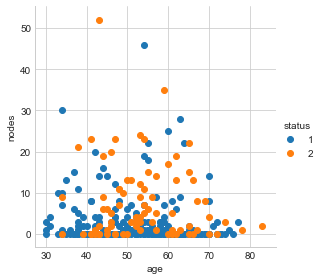

In [11]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

OBSERVATION:- From the above plot, it's very hard to distinguish between status 1 and 2, though we notice most of blue points(status 1) lies between 0 and 10 of nodes.

# PAIR PLOT

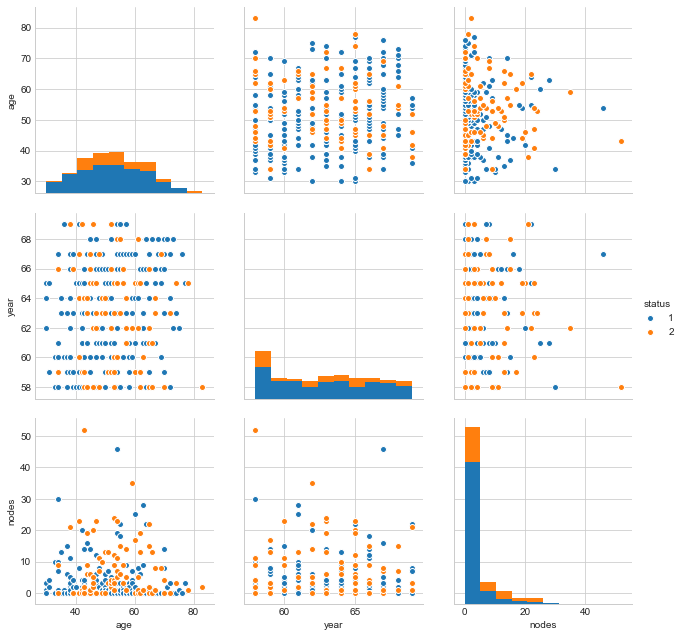

In [12]:
sns.set_style("whitegrid");
sns.pairplot(haberman, vars=["age","year","nodes"],hue="status", size=3);
plt.show()

OBSERVATION: The pair plots is not seperating the datasets thus increasing chances of error than accuracy though nodes vs year is little better but not enough to serve our purpose.

# BOX PLOT ( NODES )

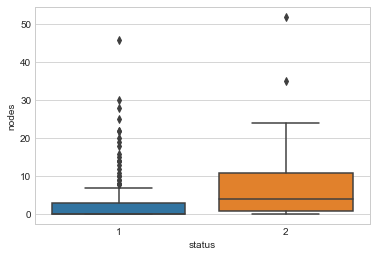

In [13]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

# VIOLIN PLOT ( NODES )

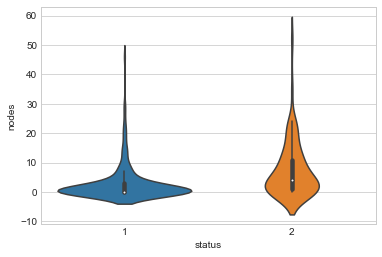

In [14]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

OBSERVATION: It's very hard to predict after considering the box and violin plots as if I take the node value between 0.0 and 0.2 in the box plot then 50 percentile of values which fall under status 2 will be misinterpreted or wrongly classified.

# CDF on Nodes

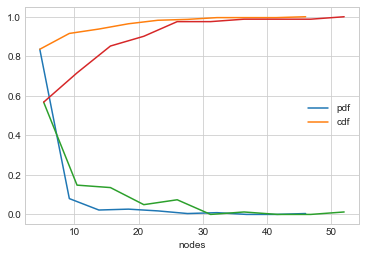

In [15]:
status1 = haberman.loc[haberman["status"] == 1];
status2 = haberman.loc[haberman["status"] == 2];

counts, bin_edges = np.histogram(status1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(status2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("nodes")
plt.legend(['pdf','cdf'])
plt.show();

OBSERVATION: From the plot of CDF on Nodes we can determnine having a node value of >= 30 and <=40 will ensure 1%-5% survival chances of patients. Because at >=30, status1 = 100%. Again at >=40 status2 =100%. and between 30 to 40 its around 95%-99%. Hence patients will have 1%-5% of survival chances.

# HISTOGRAM AND PDF OF YEAR.

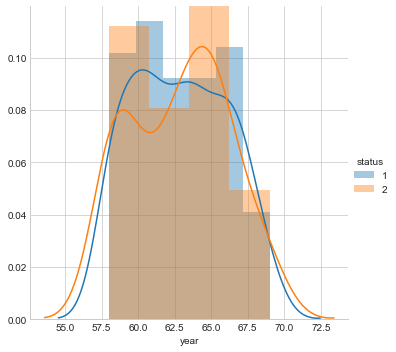

In [16]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();


#  HISTOGRAM AND PDF OF NODES.

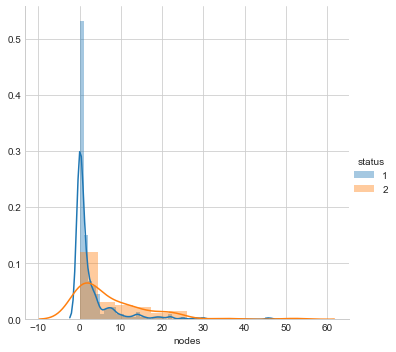

In [17]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();


# HISTOGRAM AND PDF OF AGE.

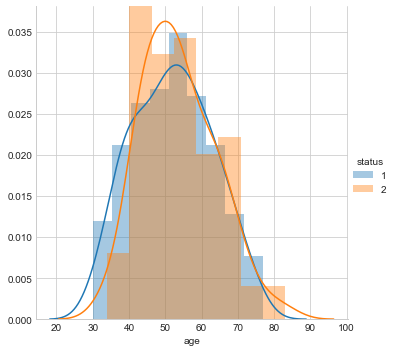

In [18]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

# CONCLUSIONS

1. Dataset is imbalanced with 225 patients surviving 5 years or longer while 81 patients die within 5 years.
2. Even the pdf and histogram analysis dosen't seperate the data as the two classifiers overlap. Pdf of nodes is slightly better than the rest. Between 0-5 node values, there are more chances of survival. Beyond that node value, there are more chances of dying.
3. From the plot of CDF on Nodes we can determnine having a node value of >= 30 and <=40 will ensure 1%-5% survival chances of patients. Because at >=30, status1 = 100%. Again at >=40 status2 =100%. and between 30 to 40 its around 95%-99%. Hence patients will have 1%-5% of survival chances.
4. Between 40-50 years of age patients will have more chances of survival.
5. Between years when the operations were performed on respective patients (1958-1960),(1964-1966),(1967-1969) more patients survived for 5 years or longer after the operation.